# Performance of models


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import warnings
warnings.filterwarnings('ignore')
import seaborn as sn

In [2]:
def read_data(raw_clinical_note):
    data = pd.read_csv(raw_clinical_note, header=0,na_filter=True)
    return data

In [3]:
raw_data = 'C:/Users/Salvador/Modelo_COVID19/Libretas manuscrito/BCM Infectius diseases/data_final_mor.csv'
data = pd.read_csv(raw_data)
print ("Total records", data.shape[0])

Total records 11564


In [4]:
X = data.drop(['Unnamed: 0','Mortality'],axis=1).astype(int)
y = data['Mortality'].astype(int) 
y = y.values.reshape(y.shape[0],1)
feature_list = X.columns
print("X:", X.shape)
print("Y:", y.shape)

X: (11564, 37)
Y: (11564, 1)


In [5]:
X.columns

Index(['Sex', 'Age', 'Pregnancy', 'Fever', 'Cough', 'Odynophagia', 'Dyspnea',
       'Irritability', 'Diarrhea', 'Chest pain', 'Chills', 'Headache',
       'Myalgia', 'Arthralgia', 'General discomfort', 'Rhinorrhea', 'Polypnea',
       'Vomiting', 'Abdominal pain', 'Conjunctivitis', 'Cyanosis',
       'Sudden onset of symptoms', 'Anosmia', 'Dysgeusia', 'Diabetes', 'COPD',
       'Asthma', 'Immunosuppression', 'Hypertension', 'HIV AIDS',
       'Cardiovascular disease', 'Obesity', 'CKD', 'Smoking', 'Puerperium',
       'Use of antipyretics', 'Days elapsed'],
      dtype='object')

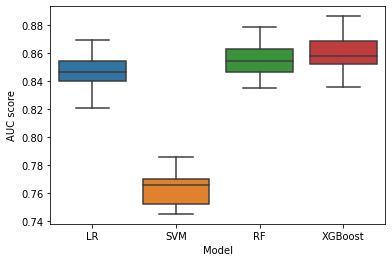

In [6]:
file = 'C:/Users/Salvador/Modelo_COVID19/Libretas manuscrito/BCM Infectius diseases/result/'
df1 = pd.read_csv(file + 'XGB_result.csv')
df1 = df1.rename(columns= {'auc':'AUC score'})
df1['Model'] = 'XGBoost'

df2 = pd.read_csv(file + 'LR_result.csv')
df2 = df2.rename(columns= {'auc':'AUC score'})
df2['Model'] = 'LR'

df3 = pd.read_csv(file + 'SVM_result.csv')
df3 = df3.rename(columns= {'auc':'AUC score'})
df3['Model'] = 'SVM'

df4 = pd.read_csv(file + 'RF_result.csv')
df4 = df4.rename(columns= {'auc':'AUC score'})
df4['Model'] = 'RF'

df_final = pd.DataFrame()
df_comp = pd.concat([df2, df3, df4,df1])

sn.boxplot(y = df_comp['AUC score'], x = df_comp['Model'])
plt.savefig('Training model’s performance' , format='pdf', bbox_inches='tight')